In [8]:
from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display
              

pykat.init_pykat_plotting(dpi=200)



In [136]:
kat = finesse.kat()
kat.verbose=True
kat.parse("""


l L0 10 0 n1                          #laser 1W
tem L0 0 0 1 0                         #tem modes m=1
tem L0 0 1 1 0 
s gap01 1 n1 n2                         #space b/w mod and laser  


mod sb1 55.5556M 0.8 1 pm n2 n3         #modulator PM 55.5556M 3f
s gap02 0.5 n3 refl                     #space b/w mod and PRM      ---> REFL <---

m ITM 0.98997 0.01 0 refl n12              #ITM
s ARM 3.3 n12 b5                        #ARM length 3.3
m ETM 0.99996 0.00001 0 b5 b6           #ETM


cav cavity ITM n12 ETM b5

attr ETM Rc 11.30m
attr ETM xbeta 0 
attr ITM xbeta 0 

s gap03 0.1 b6 b7

pd1 trans_I 55.5556M 140 b7              # REFL I quad 1f
pd1 trans_Q 55.5556M 90 b7             # REFL Q quad 1f
pd trans b7
pdtype trans_I x-split
pdtype trans_Q x-split
maxtem 3


#xaxis ITM xbeta lin 0 0.8m 800
xaxis ETM xbeta lin -0.8m 0.8m 8000 
""")

Parsing `tem L0 0 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 0 1 1 0` into pykat object not implemented yet, added as extra line.


--------------------------------------------------------------
Running kat - Started at 2022-06-16 15:59:48.549748


100% | ETA:  0:00:00 | Saving data                                             

Used Finesse None at C:\Users\Parivesh\anaconda3\envs\finesse\Library\bin\kat.exe

Finished in 8.06493 seconds

--- Output info ---

Run date and time: 2022-06-16 15:59:48.549747
Detectors used: trans, trans_I, trans_Q

One xaxis used: ['xaxis ETM xbeta lin -0.0008 0.0008 8000']
trans_I : min = -2.061228573421200e-12 max = 2.061228573421200e-12
trans_Q : min = -1.058701944223670e-12 max = 1.058701944223670e-12
trans   : min = 9.889566355561281e-07 max = 9.889566605376930e-07


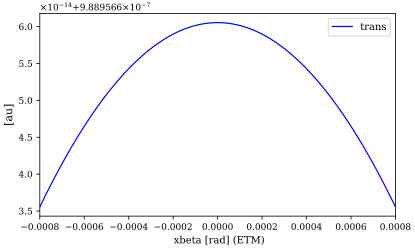

In [137]:
out = kat.run()
out.info()
out.plot(['trans'])

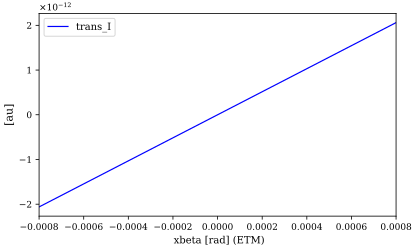

In [138]:
out.plot(['trans_I'])

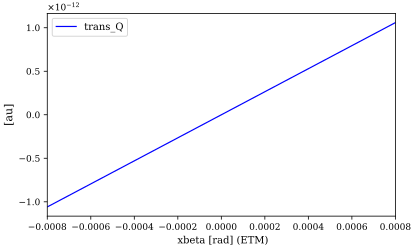

In [139]:
out.plot(['trans_Q'])